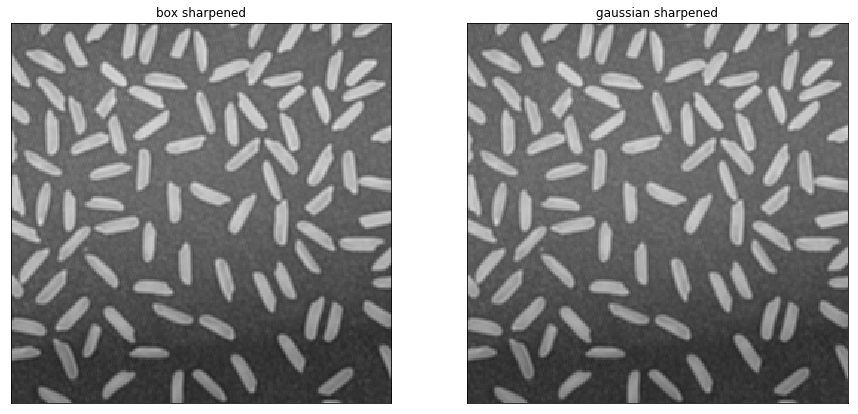

In [3]:
import cv2
import numpy as np
import skimage.measure
import matplotlib.pyplot as plt

#import the needed image
image_path = "rice.png"

image1 = cv2.imread(image_path)

#convert the image's color to rgb
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

#perform box filtering
kernel = np.ones((5,5), np.float32)/(5*5)
res1 = cv2.filter2D(image1, -1, kernel)

#perform gaussian filtering
res2 = cv2.GaussianBlur(image1, (5,5), 2)

#use formula given to get the "details" of both of the images
details1 = image1 - res1
details2 = image1 - res2

#use the given formula to get the sharpened images
sharpenedImage1 = image1 + details1
sharpenedImage2 = image1 + details2

#plot both of the sharpened images\
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(sharpenedImage1)
plt.title("box sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpenedImage2)
plt.title("gaussian sharpened"), plt.xticks([]), plt.yticks([])
plt.show()

If one wants to have a very sharp image when performing image sharpening, one should first attempt to obtain the most blurred image possible when performing the filtering step. This is because one should try to remove the most of the image as possible so the edges will pop out when the sharpening is done. This is done more effectively by the box filter and thus it should have a better sharpening effect.

In the given images it is somewhat hard to tell which sharpening is more effective due to the nature of the images (they are grey scale and not the highest quality). However it can be sen when looking at individual grains of the rice that the box image seems to pop a bit more than the gaussian one.